In [1]:
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
from scipy.special import hankel1

$$\int_{0}^l \frac{\pi \iota}{2} H_{0}^{(1)} (k|x - s|)j(s)ds = e^{\iota kxcos \theta}, l = 2 \pi$$

In [2]:
#integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i]))
        sum += F[i]
    return sum * H

#integral
def Dop(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i])) - (- 2.j / np.pi) * np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#special integral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (- 2.j / np.pi) * (np.log(x) * np.power(x, i - 1)) / (np.sqrt(4 * np.pi * np.pi + 0.j - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 2 * np.pi - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 2 * np.pi - h and xm <= 2 * np.pi:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(2 * np.pi - xm, xm, 1, N) + (1 / h) * Int(2 * np.pi - xm, xm, 2, N)
    else:
        print("error")
        return 0

In [3]:
def Processing(N):
    h = 2 * np.pi / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(4 * np.pi * np.pi - XM[m] * XM[m]) + Dop(SN[n], SN[n + 1], XM[m], N)  + 0 #LEGIT         
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 

    right1 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right1[i] = 2 / ( np.pi * 1.j) #theta = 90, cos(theta) = 0 => exp = 1

    answer1 = linalg.solve(mat, right1)

    right2 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right2[i] = (2 * np.exp(1.j * XM[i] * np.sqrt(2) / 2)) / ( np.pi * 1.j) #theta = 45, cos(theta) = sqrt(2)/2
    
    answer2 = linalg.solve(mat, right2)

    right3 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right3[i] = (2 * np.exp(1.j * XM[i])) / ( np.pi * 1.j) #theta = 0, cos(theta) = 1
    
    answer3 = linalg.solve(mat, right3)
    
    return XM, SN, answer1, answer2, answer3, N

In [4]:
res1 = Processing(50)
res2 = Processing(100)

In [5]:
def Drawing(XM, answer1, answer2, answer3, N):
    plt.rcParams['figure.figsize'] = [12, 6]

    #real
    res_real1 = np.real(answer1)
    plt.plot(XM[2: N - 2], res_real1[2: N - 2], 'bo', label = "θ = 90")

    res_real2 = np.real(answer2)
    plt.plot(XM[2: N - 2], res_real2[2: N - 2], 'bo', color = 'green', label = "θ = 45")

    res_real3 = np.real(answer3)
    plt.plot(XM[2: N - 2], res_real3[2: N - 2], 'bo', color = '#4b0082', label = "θ = 0")

    plt.legend(bbox_to_anchor=(0.92, 0.90),
               bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Re j(x)")

    plt.grid()
    plt.show()

    #imag
    res_imag1 = np.imag(answer1)
    plt.plot(XM[2: N - 2], res_imag1[2: N - 2], 'bo', label = "θ = 90")

    res_imag2 = np.imag(answer2)
    plt.plot(XM[2: N - 2], res_imag2[2: N - 2], 'bo', color = 'green', label = "θ = 45")

    res_imag3 = np.imag(answer3)
    plt.plot(XM[2: N - 2], res_imag3[2: N - 2], 'bo', color = '#4b0082', label = "θ = 0")

    plt.legend(bbox_to_anchor=(0.92, 0.90),
               bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Im j(x)")

    plt.grid()
    plt.show()

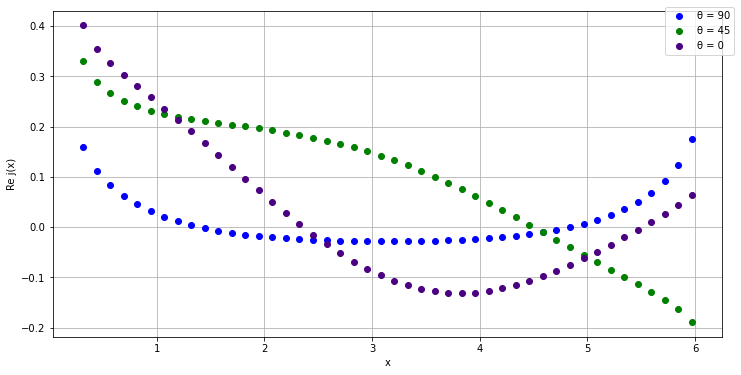

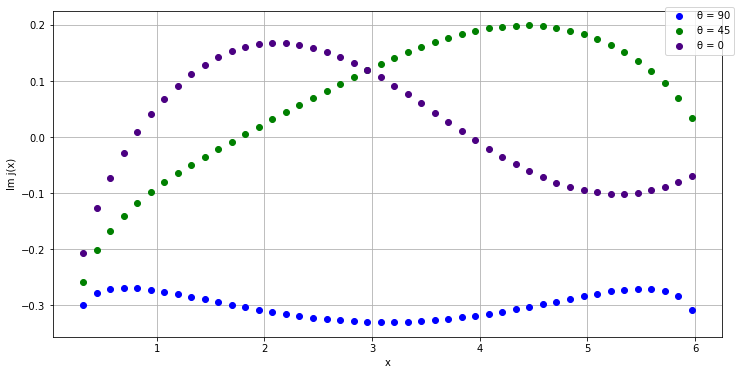

In [6]:
Drawing(res1[0], res1[2], res1[3], res1[4], res1[5])

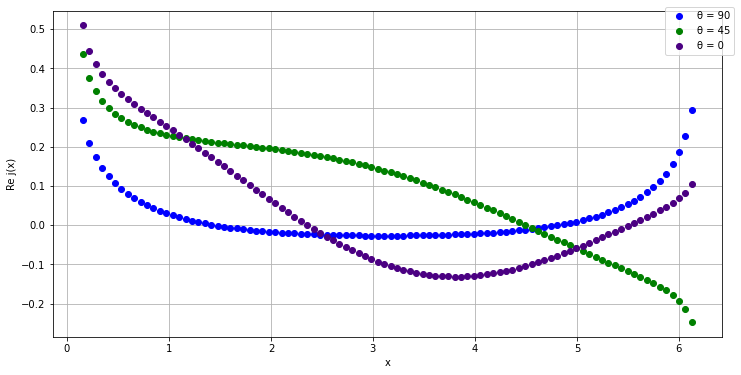

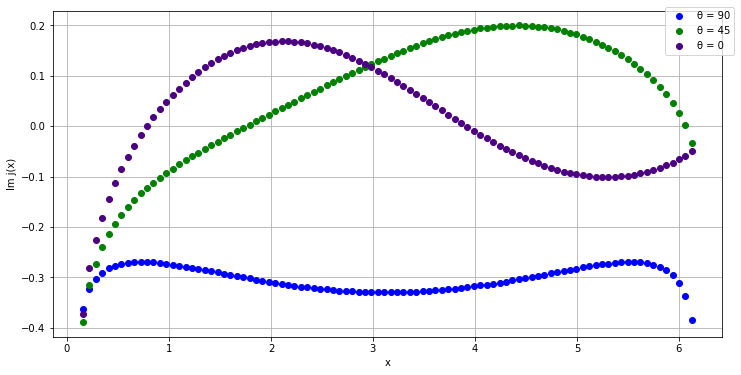

In [7]:
Drawing(res2[0], res2[2], res2[3], res2[4], res2[5])

In [8]:
def residual(xm, SN, results, N):
    extra1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        numSln1 = results[i + 2] * np.log(1 / np.abs(xm - SN[i + 2]))
        extra1[i] = numSln1 - 1

    norm1 = linalg.norm(extra1)
    print("norm = ", norm1)
    
    r1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        r1[i] = np.abs(extra1[i] / norm1)

    average1 = np.sum(r1)
    average1 /= (N - 4) 

    print("Average r = ", average1)

    plt.plot(SN[2 : N - 2], r1, 'bo', color = "brown", label = xm)

    plt.legend(bbox_to_anchor=(0.97, 0.97),
               bbox_transform=plt.gcf().transFigure)

    plt.ylabel("r")

    plt.grid()
    plt.show()

norm =  6.865758063020312
Average r =  0.14721316499315104


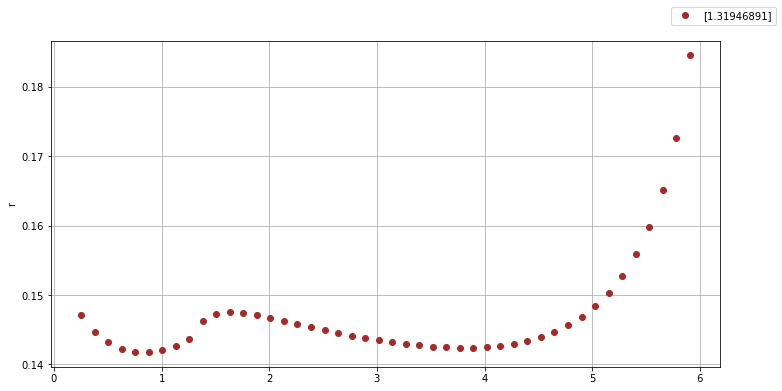

In [9]:
residual(res1[0][10], res1[1], np.real(res1[2]), res1[5])

norm =  10.001382914697096
Average r =  0.1017474603868677


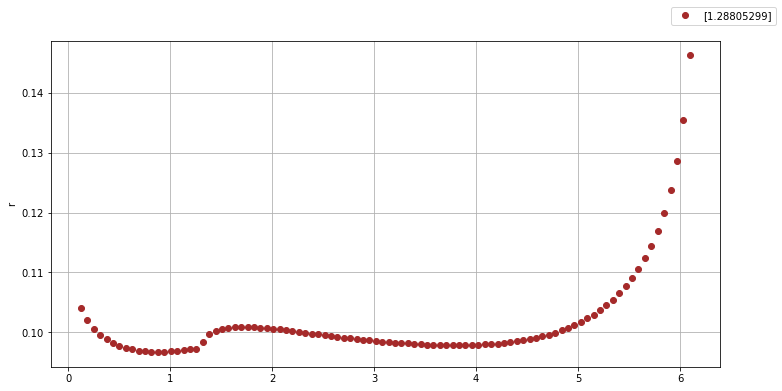

In [10]:
residual(res2[0][20], res2[1], np.real(res2[2]), res2[5])

In [11]:
######################################finding E###############################################theta = 90#################

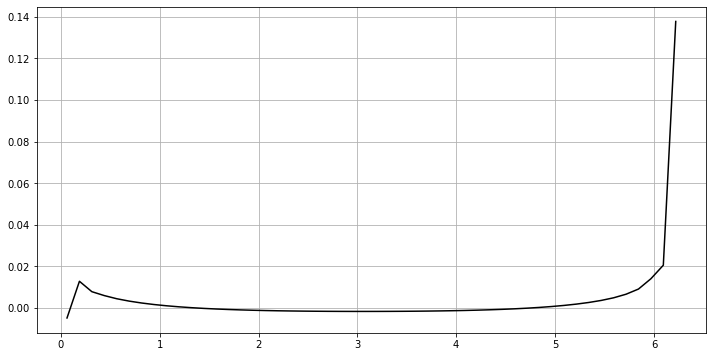

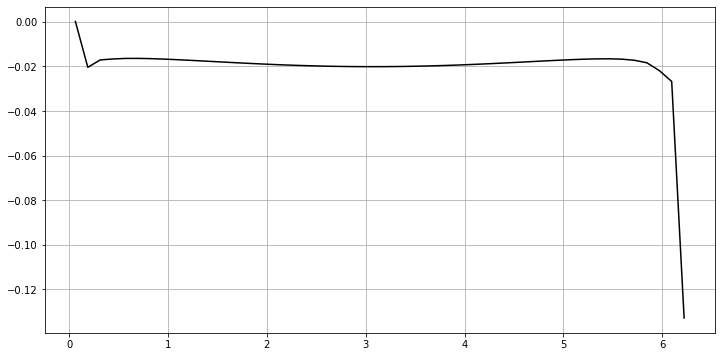

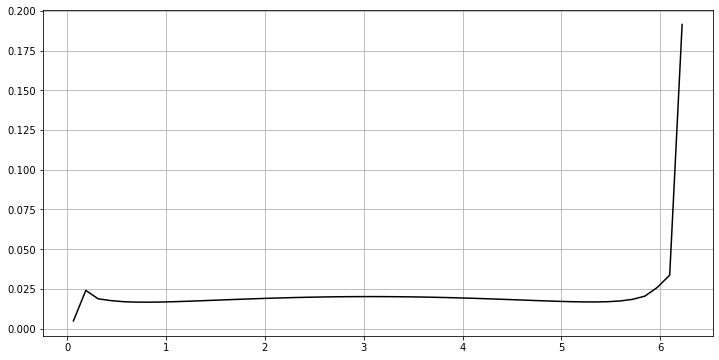

In [12]:
E = np.zeros((res1[5], 1), dtype = complex)

En = np.zeros((res1[5], 1), dtype = complex)
for i in range(res1[5]):
    En[i] = np.exp(1.j * 0)
    
RI = np.zeros((res1[5], 1), dtype = complex)
for i in range(res1[5]):
    integr = 0 + 0.j
    for j in range(res1[5]):
        integr += ( np.pi * 1.j / 2) * hankel1(0, np.abs(res1[1][j] - res1[0][i])) * res1[2][j]
    RI[i] = (2 * np.pi / res1[5]) * integr
    
for i in range(res1[5]):
    E[i] = En[i] - RI[i]
    
Ereal = np.real(E)
plt.plot(res1[0], Ereal, color = 'black')
plt.grid()
plt.show()

Eimag = np.imag(E)
plt.plot(res1[0], Eimag, color = 'black')
plt.grid()
plt.show()

Emodule = np.abs(E)
plt.plot(res1[0], Emodule, color = 'black')
plt.grid()
plt.show()

In [13]:
y = [1 + 1.j, 0 + 1.j]
print(np.abs(y))

[1.41421356 1.        ]
